In [33]:
# %load_ext pycodestyle_magic

In [34]:
# %flake8_on --max_line_length 119

In [35]:
# %pycodestyle_on

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Задание 1

***Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). Данные лежат в папке shared  Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.***

In [37]:
regtime = pd.read_csv('/home/jupyter-d.podakova-15/shared/problem1-reg_data.csv', sep=';')

In [38]:
signtime = pd.read_csv('/home/jupyter-d.podakova-15/shared/problem1-auth_data.csv', sep=';')

In [39]:
# создаю функцию для полной проверки данных
def describing(x):
    divider = "---"
    print("Строк: {},колонок: {}".format(x.shape[0], x.shape[1]))
    print("\n {} \n".format((divider * 30)))
    print("Типы колонок \n\n", x.dtypes)
    print("\n {} \n".format((divider * 30)))
    print("Описание данных \n\n", x.describe().round(2))
    print("\n {} \n".format((divider * 30)))
    print("Проверка на пропуски \n\n", x.isna().sum())
    print("\n {} \n".format((divider * 30)))
    return

In [40]:
# ретеншен рассчитывается по  c месячным интервалом
def retention_month(df, since, until):
    df['reg_ts_month'] = df['reg_ts'].dt.to_period('M')
    df['month_ingame'] = ((df['auth_ts'] - df['reg_ts']) / np.timedelta64(1, 'M')) + 1
    df['month_ingame'] = df['month_ingame'].astype(int)
    count_month = df.groupby(['month_ingame', 'reg_ts_month'], as_index=False)\
        .agg({'uid': 'nunique'})\
        .pivot(index='reg_ts_month', columns='month_ingame', values='uid')[since:until]
    base_month = count_month[1]
    retention_month = count_month.divide(base_month, axis=0).round(3)
    plt.figure(figsize=(18, 12))
    plt.title('Retention по месячным когортам')
    ax = sns.heatmap(data=retention_month.iloc[:, 0:12],
                     cmap='RdYlGn',
                     annot=True,
                     fmt='.2f')
    ax.set_yticklabels(retention_month.index)
    fig = ax.get_figure()
    fig.savefig("Retention.png")
    return count_month.iloc[:, 0:12]
    fig.savefig("Retention.png")
    return count_month.iloc[:, 0:12]

In [41]:
# описываю данные, понимаю,что время в unix формате,возврашаюсь в строку импортов и импортирую нужную библиотеку.
#  я еще испытаю функцию ниже,а тут выведу head
regtime.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [42]:
# переводим в дни дату, в недели, можно и в месяца с таким количеством данных
signtime[['auth_ts']] = signtime[['auth_ts']].apply(pd.to_datetime, unit="s")
regtime[['reg_ts']] = regtime[['reg_ts']].apply(pd.to_datetime, unit="s")

In [43]:
#  я решила выбрать лефт джоин, потому что было предположение,
# что возможно будут пропуски в дате авторизации и могут потеряться данные
df = signtime.merge(regtime, how='left', on='uid')

In [44]:
# вижу,что пропусков нет, можно сразу приступать к обработке данных
describing(df)

Строк: 9601013,колонок: 3

 ------------------------------------------------------------------------------------------ 

Типы колонок 

 auth_ts    datetime64[ns]
uid                 int64
reg_ts     datetime64[ns]
dtype: object

 ------------------------------------------------------------------------------------------ 

Описание данных 

               uid
count  9601013.00
mean    334719.84
std     283266.91
min          1.00
25%      95997.00
50%     257921.00
75%     519025.00
max    1110622.00

 ------------------------------------------------------------------------------------------ 

Проверка на пропуски 

 auth_ts    0
uid        0
reg_ts     0
dtype: int64

 ------------------------------------------------------------------------------------------ 



month_ingame,1,2,3,4,5,6,7,8,9,10,11,12
reg_ts_month,,,,,,,,,,,,
2019-09,26689.0,2757.0,1364.0,1364.0,1364.0,1364.0,1364.0,1364.0,1364.0,1364.0,1364.0,1364.0
2019-10,28998.0,2989.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0,1475.0,974.0
2019-11,29505.0,3034.0,1433.0,1433.0,1433.0,1433.0,1433.0,1433.0,1433.0,1433.0,1010.0,NaN
2019-12,32057.0,3370.0,1640.0,1640.0,1640.0,1640.0,1640.0,1640.0,1640.0,1115.0,NaN,NaN
2020-01,33733.0,3402.0,1689.0,1689.0,1689.0,1689.0,1689.0,1689.0,1133.0,NaN,NaN,NaN
2020-02,33152.0,3350.0,1630.0,1630.0,1630.0,1630.0,1630.0,1121.0,NaN,NaN,NaN,NaN
2020-03,37231.0,3843.0,1907.0,1907.0,1907.0,1907.0,1335.0,NaN,NaN,NaN,NaN,NaN
2020-04,37884.0,3958.0,1937.0,1937.0,1937.0,1353.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05,41159.0,4357.0,2111.0,2111.0,1481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


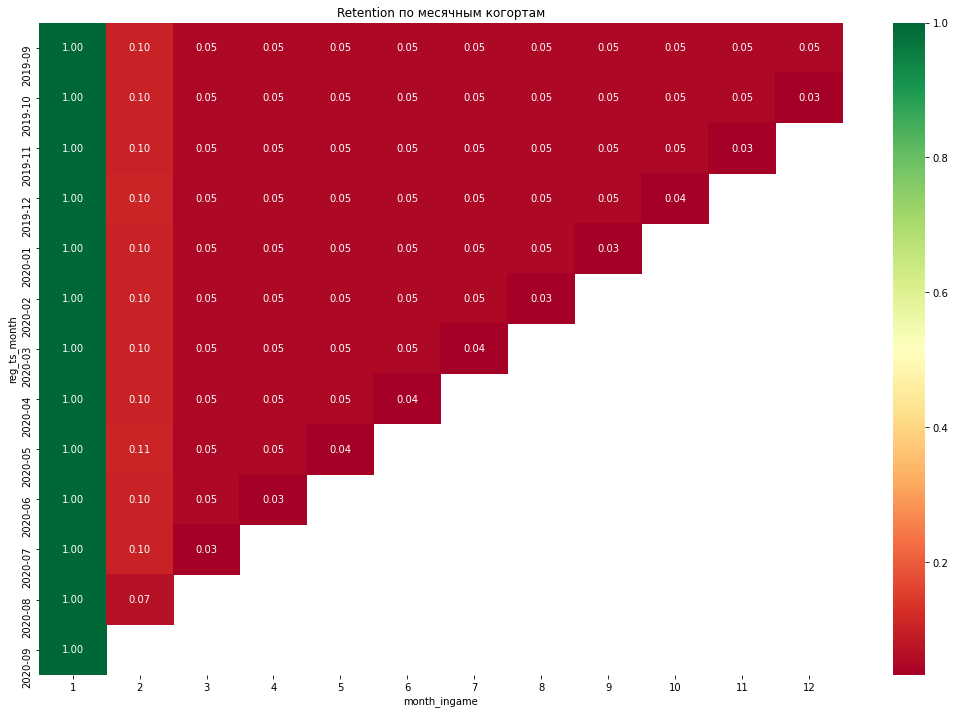

In [45]:
# даже с учетом преобразования в месяца, когорты будут слишком большие. принимаю решение ограничить данные.
retention_month(df, '2019-09-01', '2020-09-23')

## Вывод:
***на картинке предоставлен ретеншин в течение года. Какие-то когортв остаются в размере 5% от поступивших в начале,  
ближе к концу данных, ретеншен снижается. полагаю данные сгенерированы***


Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.

## Задание 2
***Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.***

***Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?***

In [46]:
df_ab = pd.read_csv('/home/jupyter-d.podakova-15/shared/problem2.csv', sep=';')

In [47]:
df_ab.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [48]:
# описываю данные, пропусков нет
describing(df_ab)

Строк: 404770,колонок: 3

 ------------------------------------------------------------------------------------------ 

Типы колонок 

 user_id       int64
revenue       int64
testgroup    object
dtype: object

 ------------------------------------------------------------------------------------------ 

Описание данных 

          user_id    revenue
count  404770.00  404770.00
mean   202385.50      26.08
std    116847.18     681.65
min         1.00       0.00
25%    101193.25       0.00
50%    202385.50       0.00
75%    303577.75       0.00
max    404770.00   37433.00

 ------------------------------------------------------------------------------------------ 

Проверка на пропуски 

 user_id      0
revenue      0
testgroup    0
dtype: int64

 ------------------------------------------------------------------------------------------ 



In [49]:
# сначала вычислю общие характеристики
all = df_ab.groupby(['testgroup'], as_index=False)\
    .agg(users=('user_id', 'nunique'),
         mean=('revenue', 'mean'),
         revenue=('revenue', 'sum'),
         std_all=('revenue', 'std'))

In [50]:
# характеристики платящих
paying_user = df_ab.query('revenue>0').groupby(['testgroup'], as_index=False)\
    .agg(paying_u=('user_id', 'nunique'),
         pay_mean=('revenue', 'mean'),
         std_paying=('revenue', 'std'),
         pay_max_check=('revenue', 'max'),
         pay_min_check=('revenue', 'min'))

In [51]:
# объелиняю это в одну табличку, которая подтверрждает цифры из описания задачи
table = paying_user.merge(all)

In [52]:
table = table.assign(ARPU=(table.revenue / table.users).round(),
                     ARPPU=(table.revenue / table.paying_u).round(),
                     paying_share=(table.paying_u / table.users).mul(100).round(2))
table

,testgroup,paying_u,pay_mean,std_paying,pay_max_check,pay_min_check,users,mean,revenue,std_all,ARPU,ARPPU,paying_share
0,a,1928,2663.998444,9049.039763,37433,200,202103,25.413720,5136189,920.768137,25.0,2664.0,0.95
1,b,1805,3003.658172,572.619709,4000,2000,202667,26.751287,5421603,287.324162,27.0,3004.0,0.89


Мы видим многообещающие данные по b группе  **ARPU( средняя выручка на пользователя)** 27 единиц валюты против 25 группы a,
и  3004  против  2664 в **ARPPU (средняя выручка на платящего пользователя)**, 
правда, настораживает меньшая **доля платящих** 0.89%  против 0.95% группы а, 
**стандартное отклонение** группы b  ближе к 0, значит обладает меньшей вариабельностью данных (287.3 против 920.7  среди всех пользователей, 572.6  против 9049.0  среди платящих пользователей). 
Скорее всего, среди группы А – затесались покупатели-«киты», сильно влияющие величиной своего чека. 
Для проверки этого предположения были добавлены **показатели минимального и максимального чека**. Да, у группы a очень интересный скачок до 37433 валюты, в то время как группа b более стабильна в своих чеках как в минимальном так и максимальном сегменте.

In [53]:
# отберем данные для построения графика и экспериментов
df_ab_payments = df_ab.query('revenue > 0').table = table.assign(ARPU=(table.revenue / table.users).round(),
                                                                 ARPPU=(table.revenue / table.paying_u).round(),
                                                                 paying_share=(table.paying_u / table.users)
                                                                 .mul(100).round(2))
table

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,testgroup,paying_u,pay_mean,std_paying,pay_max_check,pay_min_check,users,mean,revenue,std_all,ARPU,ARPPU,paying_share
0,a,1928,2663.998444,9049.039763,37433,200,202103,25.413720,5136189,920.768137,25.0,2664.0,0.95
1,b,1805,3003.658172,572.619709,4000,2000,202667,26.751287,5421603,287.324162,27.0,3004.0,0.89


# теория о вариабельности данных в группе а подтверждается. Выброс сильно повлиял на итоги теста


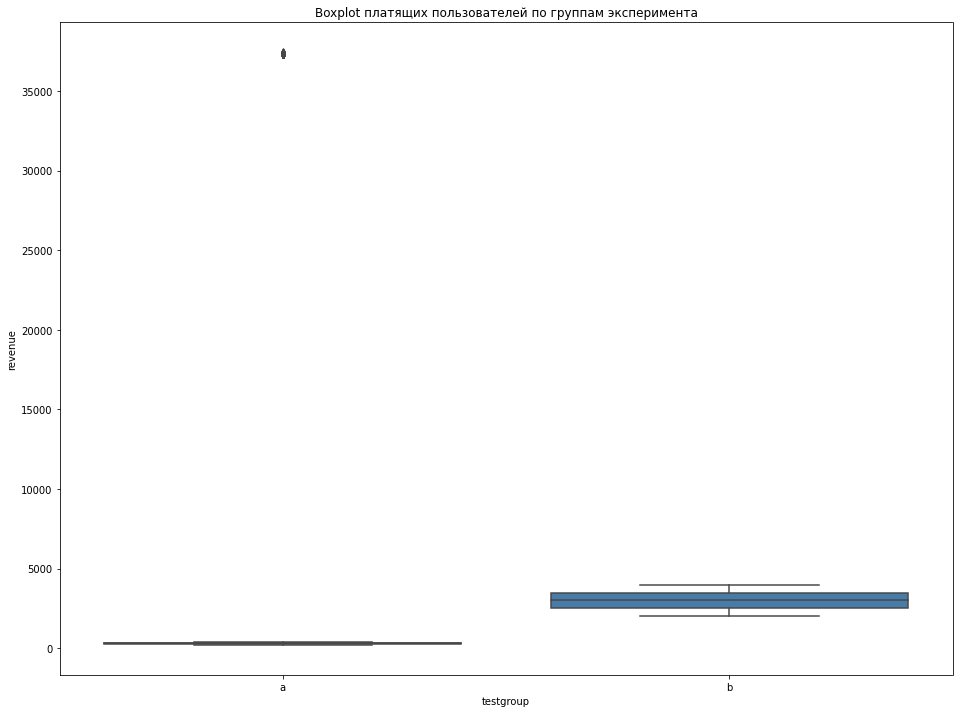

In [64]:
# отберем данные для построения графика и экспериментов
# теория о вариабельности данных в группе а подтверждается. Выброс сильно повлиял на итоги теста
df_ab_payments = df_ab.query('revenue>0')
plt.figure(figsize=(16, 12))
plt.title('Boxplot платящих пользователей по группам эксперимента')
sns.boxplot(y="revenue", x='testgroup', data=df_ab_payments, palette="Set1", order=["a", "b"])

**перед выбором метода сравнения групп, попробуем проверить распределение данных, 
нормальное оно или нет, хотя боксплот дал подсказку,что нет**

In [55]:
control_results = df_ab[df_ab['testgroup'] == 'a']['revenue']
test_results = df_ab[df_ab['testgroup'] == 'b']['revenue']

In [56]:
def ks_test(sample, n='norm'):
    """Тест Колмогорова-Смирнова"""
    sample_ks_test = stats.kstest(sample, n)
    p_value = round(sample_ks_test[1], 3)
    if p_value > 0.05:
        return f'p-value={p_value} > 0.05 (нор. рас.) - тест К-С'
    return f'p-value={p_value} < 0.05 (НЕ нор. рас.) - тест К-С'


def shapiro_test(sample, n='norm'):
    """Тест Шапиро-Уилко"""
    sample_shapiro_test = stats.shapiro(sample)
    p_value = round(sample_shapiro_test[1], 3)
    if p_value > 0.05:
        return f'p-value = {p_value} > 0.05 (нор. рас.) - тест Ш-У'
    return f'p-value = {p_value} < 0.05 (НЕ нор. рас.) - тест Ш-У'

In [57]:
print(f'{ks_test(control_results)} - a группа')
print(f'{shapiro_test(control_results)} - a группа')
print()
print(f'{ks_test(test_results)} - b группа')
print(f'{shapiro_test(test_results)} - b группа')

p-value=0.0 < 0.05 (НЕ нор. рас.) - тест К-С - a группа
p-value = 0.0 < 0.05 (НЕ нор. рас.) - тест Ш-У - a группа

p-value=0.0 < 0.05 (НЕ нор. рас.) - тест К-С - b группа
p-value = 0.0 < 0.05 (НЕ нор. рас.) - тест Ш-У - b группа


/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


***В выполненных тестах все значения p-value < 0.05, т.е. выборки распределены не нормально.Пришло время статистического анализа ab теста. Распределение не нормальное, есть большие выбросы - берем непараметрический критерий Манна-Уитни.  Нулевая гипотеза в том,что наборы акционных предложений ничем не отличаются***

In [58]:
mw_test = stats.mannwhitneyu(control_results, test_results)

In [59]:
if mw_test[1] > 0.05:
    print(f'Манн-Уитни p-value={round(mw_test[1], 3)} > 0.05 - стат. зн. раз. не обнаружено.')
else:
    print(f'Манн-Уитни: p={round(mw_test[1], 3)} < 0.05 - выборки различаются статистически значимо.')

Манн-Уитни p-value=0.063 > 0.05 - стат. зн. раз. не обнаружено.


**нам будет дан такой ответ, если мы возьмем изначальный датафрейм с множеством неплатящих игроков.Этим примером показано различие в выводах,если выбран неправильный набор данных для анализа.В нашем случае 0 дали слишком большой "шум".  Возьмем  только платящих** 

### Вывод: да, набор b статистически различается от набора a  в лучшую сторону. Выбираем для своей игры этот набор 

Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.

## Задание 3
***В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?***

Судя по названию, данная игра относится к типу "ферма". В таких играх важны социальные метрики (игроки хвастаются более совершенной условной "фермой", либо главная фича в игре - это обмен ресурсами). Мы должны учитывать это. К тому же в таких  экспериментах мы имеем в голове четкое представление, на какую категорию  игроков все же направлен ивент. Здесь я делаю предположение, что на все категории:
- Киты (самые крупно платящие  игроки)
- Дельфины (средние)
- Мальки (с маленьким чеком)
- есть еще бесплатно играющие, самая большая категория, зато благодаря ей игра продвигается, и они могут стать платящими.  
(  внизу картинка по распределениям доли платящих  категорий в основных жанрах мобильных игр).
Фермы относятся к классификации Casual (простые механики, низкий порог вхождения), полагаю, они уже относятся к отдельному жанру,но для понимания картинки сделаем допущение что это либо Simulation либо Puzzle.
А также нужно учитывать направлена  ли акция на ***новых игроков*** и их более быстрого адаптирования в игре или простимулировать ***«старичков»***

 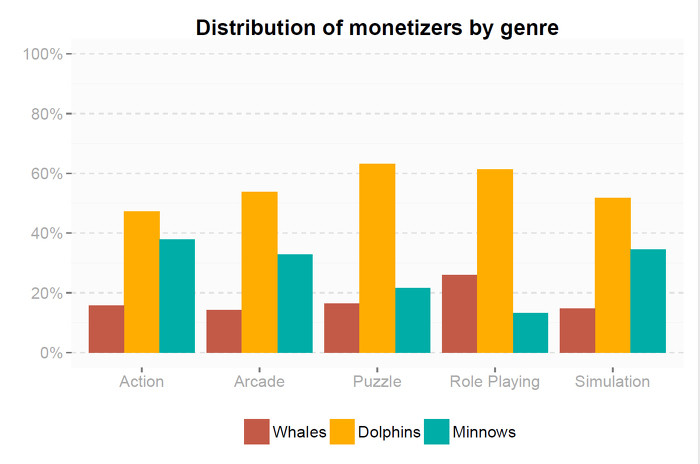
 

-**Retention n-дня** с момента проведения события. Покажет, насколько полученные бонусы мотивировали игроков остаться в игре.  
-**Количество покупок в магазине игры за настоящие деньги**: оно обычно падает на некоторый период времени после акции, 
потому что обычно в таких играх обязательно будут участовать хардкорные игроки, которые и без акции бы покупали в магазине.  
-**ARPU**- сильно просядет так как будет больше пользователей, на число которых нужно делить доход.  
-**ARPPU** - аналогично, часть бывших платящих на некоторое время будут пользоваться бонусами.  
-**DAU** - дневная аудитория всех дней, в которые проводится акция. Полагаю, что за ней нужно следить еще и с технической точки зрения: вдруг нагрузка от привлеченных пользователей будет слишком высока и сервера упадут.  
-**Paying Users (paying share)** - абсолютная величина и % доля платящих игроков. Цель в  том,чтобы увеличить ее. Например, из-за акции более скилловые игроки увеличили свои ресурсы и  остальные увидели классные предметы в игре и захотели такие же.   
-**Количество пользователей, участвующих в событии**  
-**Количество пройденных бонусных уровней**  
-**Конверсии в платящих**  
-**Время проведенное в аппе либо количество заходов**  
-**К-фактор, то есть виральность** вспомнили ли редкозаходящие пользователи о нашей игре и привлеклись ли новые игроки  

***Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок   будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?***

Вспоминаем, что это жанр -  ферма, класс- Casual. Подобное нововведение психологически нетипичное для основной аудитории этого жанра, но даже среди них могут быть авантюристы и киллеры (психологические подтипы)     
Первый шаг – это провести в первую очередь ab-тест, насчет того, целесообразно ли такое событие.  
К метрикам добавятся:   
-**Количество попыток пройти уровни**  
-**Временные метрики прохождения уровней**  
-**Ранги сложности бонусных уровней** на каком игроки «падают» назад в уровнях, чтобы определить  с какого начинаются сложности